<div dir="rtl">
    
# تمرین کامپیوتری سوم هوش مصنوعی - مجید فریدفر - 810199569

---

</div>

<div dir="rtl">

*
در این پروژه، هدف این است که بر اساس مفاهیم 
Naive Bayes 
که در درس بررسی شد، مدلی طراحی کنیم که بتواند ارقام فارسی را تشخیص بدهد.
 
</div>

<div dir="rtl">

*
در اینجا، این ارقام به عنوان ورودی در قالب یه یک سری تصویر در دسترس هستند. هم‌چنین از یک 
dataset 
استفاده می‌کنیم که حاوی 
6000 
تصویر مختلف است که همگی آن‌ها دارای 
lable 
هستند.

</div>

<div dir="rtl">

*
دیتاهای این 
dataset
در فایل‌های
`data.pkl`
و
`label.pkl`
ذخیره شده‌اند. به این منظور با استفاده از تابع
`load`
در کتابخانه‌ی 
`pickle`
 و قطعه کد زیرآن‌ها را می‌خوانیم و در آرایه‌های
`data`
و
`label`
می‌ریزیم.
   
</div>

In [1]:
import pickle

pkl_file = open('Datasets/data.pkl', 'rb')
data = pickle.load(pkl_file)

pkl_file = open('Datasets/label.pkl', 'rb')
label = pickle.load(pkl_file)

<div dir="rtl">
    
# سوال دوم
*
حالا با استفاده از تابع
`imshow`
در کتابخانه‌ی
`matplotlib`
یکی از دیتاها را به صورت رندوم، نمایش می‌دهیم.
(به همراه 
label
و آرایه‌ی
pixel
های آن)
    
</div>

Label: 6
Data:
[[  0   0   0   0   0   0   0 255 255 255 255 255   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0
    0]
 [  0   0   0   0   0 255 255 255 255 255   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0 255 255 255 255   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0 255 255 255 255   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0 255 255 255 255   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0 255 255 255 255 255   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0 255 255 255 255 255   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0 255 255 255 255   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0 255 255 255 255 255   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255 255
    0]
 [  0 255 255 255 255 255   0   0   0 255 255 255 255 255 255 255 255 255
  255]
 [255 255 255

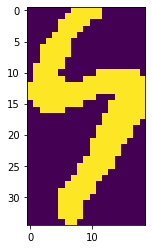

In [2]:
import matplotlib.pyplot as plt
import random

random_index = random.randint(0,len(data))
print("Label:", label[random_index])
print("Data:")
print(data[random_index])
print("Display:")
plt.imshow(data[random_index])

<div dir="rtl">
    
*
همان طور که مشاهده می کنید، مقادیر
پیکسل ها،
0
یا
255
است.
---
    
</div>
    
<div dir="rtl">
    
# سوال سوم
*
حالا با استفاده از تابع
`resize`
در کتابخانه‌ی
`OpenCV`
همه‌ی داده‌های این
dataset
را
resize
می‌کنیم تا
20
در
20
بشوند. همچنین تعیین می‌کنیم که تصویر حاصل، تمام پیکسل‌هایش از جنس
`float`
باشند. (جلوتر از این ویژگی استفاده خواهیم کرد).

</div>

<div dir="rtl">

*
دلایل انجام این کار:

</div>

<div dir="rtl">

1.
می‌توان رفتار یکسان با هرکدام از دیتاها داشت. به این معنی که لازم نیست با توجه سایز عکس، تصمیم بگیریم مثلا از چه پیکسل تا چه پیکسلی را به صورت افقی بخوانیم.

</div>

<div dir="rtl">

2.
به این ترتیب قالب کلب تمام داده‌هایمان مثل هم می‌شود. این مثل یک استاندارد است که تعریف می‌کنیم. چون حالا تمامی داده‌ها می‌توانند در فرایندهایمان شرکت داده شوند. همچنین نگه داری و پردازش آن‌ها ساده‌تر می‌شود.
    
</div>

<div dir="rtl">

3.
ویژگی‌های مشترک و الگوهای تکرارشونده دقیق‌تر پیدا می‌شوند.

</div>

<div dir="rtl">

*
برای نمونه، می‌توانید همان تصویری که پیش‌تر نمایش دادیم را مشاهده کنید که حالا سایز آن
20
در 
20
شده.
    
</div>

[[  0.   0.   0.   0.   0.   0.  65. 195. 255. 255. 255. 255. 159.   0.
    0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 185. 255. 255. 255. 238. 117.   0.   0.   0.
    0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0. 173. 246. 255. 255. 127.  15.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.]
 [  0.   0. 139. 238. 255. 255. 255.  96.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.]
 [  0.   0. 223. 255. 255. 255. 190.  60.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.]
 [  0. 236. 255. 255. 255. 232.  73.   0.   0.   0.   0.  14.  32.  32.
   32.  32.  32.  32.  29.   0.]
 [  0. 236. 255. 255. 255. 232.  73.   0.   0. 117. 223. 237. 255. 255.
  255. 255. 255. 255. 252. 223.]
 [255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
  255. 255. 255. 255. 255. 255.]
 [159. 248. 255. 255. 255. 255. 255. 255. 255. 205. 159.  92.   0.  31.
  139. 255. 255. 255. 255. 255.]
 [  0.   0. 195. 223. 223. 223.  73.   0.   0.   0.   0

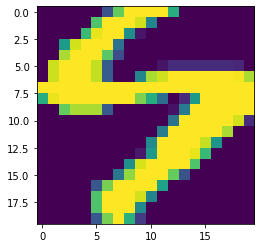

In [3]:
import numpy as np
import cv2

resized_data = []
for image in data:
    resized_data.append(cv2.resize(np.array(image), (20, 20)).astype(float))

print(resized_data[random_index])
plt.imshow(resized_data[random_index])

<div dir="rtl">
    
*
همان طور که مشاهده می‌کنید، مقادیر پیکسل‌ها حالا عددی بین
0
و
255
است.
---
    
</div>

<div dir="rtl">
    
# سوال اول
*
80
درصد از کل داده‌ها را برای
train
می‌گذاریم و
20
درصد دیگر را برای
test.
به این منظور دو تا آرایه‌ی دو بعدی تعریف می‌کنیم به نام‌های
`train_data`
و
`test_data`.
به این صورت که داده‌ها بر اساس
label
هایشان در آن‌ها طبقه‌بندی شده‌اند. به عنوان مثال تمام داده‌های موجود در
`test_data[4]`
برای 
test
هستند و عدد
4
را نمایش می‌دهند.
    
</div>

<div dir="rtl">

*
تعیین این طریقه‌ی قسمت بندی، روش کلی‌ای ندارد و بستگی به دیتا و اندازه‌ی آن دارد. خوب است چند روش مختلف را امتحان کنیم تا به بهترین تقسیم‌بندی ممکن برسیم. اما  تجربه ثابت کرده است که بهترین نتایج معمولا زمانی حاصل می‌شوند که بین 70 تا 80 درصد داده‌ها را برای
train
استفاده کنیم و بقیه‌ی آن را برای
test.
در اینجا من 80 درصد را انتخاب کرده‌ام، تا مدل، الگوهای بیشتری را بتواند شناسایی بکند.

    
</div>

In [4]:
train_part = 0.8

num_of_train_data = int(train_part*len(resized_data))

train_data = [[] for _ in range(10)]
for i in range(num_of_train_data):
    train_data[label[i]].append(resized_data[i])

test_data = [[] for _ in range(10)]
for i in range(num_of_train_data, len(resized_data)):
    test_data[label[i]].append(resized_data[i])

<div dir="rtl">
    
# سوال چهارم
*
در ادامه می‌توانید
10
داده‌ی نمونه از هر کلاس را به ترتیب مشاهده کنید. (از چپ به راست)

</div>

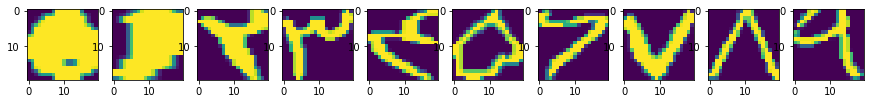

In [5]:
fig, ax = plt.subplots(1, 10, figsize=(15, 15))

for i in range(10):
    ax[i].imshow(train_data[i][random.randint(0, len(train_data[i]))])

<div dir="rtl">

# سوال پنجم
*
دو آرایه تعریف می‌کنیم به نام‌های
`train_count`
و
`test_count`.
که در آن‌ها مشخص می‌کنیم مثلا از بین داده‌های
train
چه تعدادی در کلاس
0
قرار دارند. همینطور برای دیگر کلاس‌ها و داده‌های
test.

</div>

<div dir="rtl">

*
حالا برای آن‌ها نمودار میله‌ای رسم می‌کنیم. (با استفاده از توابع کتابخانه‌ی
`matplotlib`).

</div>

[475, 482, 487, 475, 488, 500, 454, 493, 475, 471]
[125, 118, 113, 125, 112, 100, 146, 107, 125, 129]


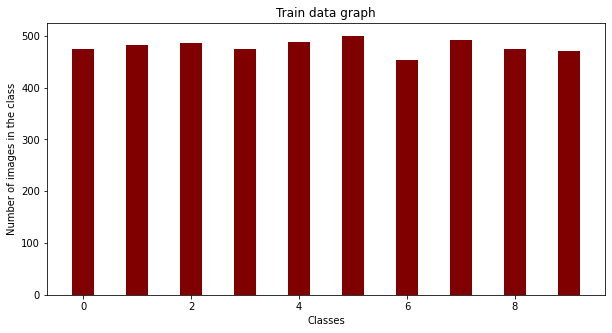

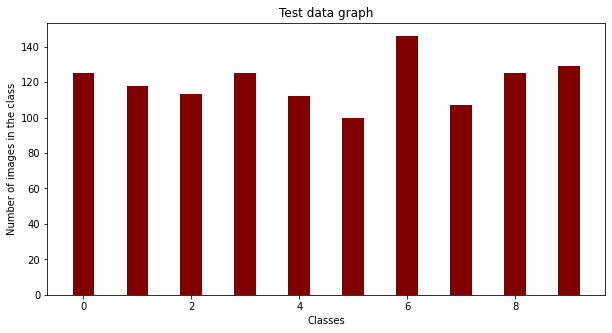

In [6]:
train_count = [len(train_data[i]) for i in range(10)]
test_count = [len(test_data[i]) for i in range(10)]

print(train_count)
print(test_count)
 
plt.figure(figsize = (10, 5))
plt.bar(range(10), train_count, color ='maroon',
        width = 0.4)
 
plt.xlabel("Classes")
plt.ylabel("Number of images in the class")
plt.title("Train data graph")
plt.show()

plt.figure(figsize = (10, 5)) 
plt.bar(range(10), test_count, color ='maroon',
        width = 0.4)
 
plt.xlabel("Classes")
plt.ylabel("Number of images in the class")
plt.title("Test data graph")
plt.show()

<div dir="rtl">

# سوال ششم
*
همان‌طور که پیش‌تر ذکر شد، مقادیر هر پیکسل در داده‌های
resize
شده، بین
0
تا
225
است. برای این که این بازه را به
[0,1]
تبدیل کنیم، کافی است، تمامی این مقادیر را بر
255 
تقسیم کینم. انجام این کار در دو حلقه (یکی برای داده‌های
`train_data`
و یکی برای داده‌های
`test_data`)
انجام پذیر است.

</div>

<div dir="rtl">

*
از خاصیت
`float`
بودن پیکسل‌های شکل‌هایمان در اینجا استفاده می‌شود. به این صورت که می‌توانند مقادیر اعشاری را هم بپذیرند. اگر این کار را نمی‌کردیم، در نهایت مقادیر پیکسل‌ها
0
یا
1
بود.

</div>

<div dir="rtl">

*
اگر این کار را انجام ندهیم، ممکن است به نتایج نامطلوبی منجر بشود. مثلا به جای این که مدل دنبال الگوهای مختلف باشد، روی فاصله‌ی مقادیر پیکسل‌ها تمرکز بکند.

</div>

In [7]:
for l in range(10):
    for d in range(train_count[l]):
        for i in range(20):
            for j in range(20):
                train_data[l][d][i][j] /= 255.0

    for d in range(test_count[l]):
        for i in range(20):
            for j in range(20):
                test_data[l][d][i][j] /= 255.0

<div dir="rtl">
    
# سوال هفتم
* می‌دانیم `قانون بیز` به شکل زیر است:

$$P(c|X) = \frac{P(X|c)P(c)}{P(X)}$$
    
*
در ادامه به توضیح هر کدام از این بخش‌ها می‌پردازیم:
    
    
1.
`P(c|X)`
یا
`Posterior Probability`:
به معنی احتمال رخ دادن پیشامد
c
پس از مشاهده‌ی رخ دادن پیشامد
X
است. در این مسئله می‌توان این موضوع را این طور بیان کرد: 
**در صورتی که ورودی
X
را مشاهده کنیم، چقدر احتمال دارد از کلاس
c
باشد؟**. این چیزی است، که به دنبال محاسبه‌ی آن هستیم.

</div>

<div dir="rtl">

2.
`P(c)`
یا
`Likelihood`:
به معنی احتمال رخ دادن پیشامد
X
پس از مشاهده‌ی رخ دادن پیشامد
c
است. در این مسئله می‌توان این موضوع را این طور بیان کرد: 
**چقدر احتمال دارد ورودی
X
از کلاس
c
باشد؟**
ولی چیزی که ما از آن استفاده می‌کنیم، در اصل 
`P(Xi = y|c)`
است. به این معنی که احتمال مشاهده‌ی مقدار
y
در پیکسل
i
ام، در بین داده‌های کلاس
c
چقدر است؟
که برای محاسبه‌ی آن در دو روشی که در ادامه بررسی می‌شوند، یک سری فرمول داریم. که در واقع آن را از روی داده‌های
`train`
تخمین می‌زند.

</div>

<div dir="rtl">

3.
`P(c)`
یا
`Class Prior Probability`:
به معنی احتمال رخ دادن پیشامد
c
است. این احتمال را به سادگی از روی داده‌های
train
می‌توان تخمین زد. به این صورت که احتمال کلاس 
c
برابر است با تعداد داده‌های با لیبل 
c
تقسیم بر تعداد همه‌ی داده‌ها. می‌توانیم از کد زیر استفاده کنیم:

</div>

In [8]:
class_prior_probability = [train_count[i]/num_of_train_data for i in range(10)]

<div dir="rtl">

4.
`P(X)`
یا
`Predictor Prior Probability`
یا
`Evidence`:
به معنی احتمال رخ دادن پیشامد
X
است. این قسمت، مربوط به احتمال رخ دادن ویژگی‌های مختلف تصویر می‌شود.
    
</div>

<div dir="rtl">

*
بعد از اعمال استقلال‌های شرطی، و استفاده از قضیه‌ی بیز که توضیح داده شد، چیزی در نهایت باید محاسبه کنیم، رابطه‌ی زیر است:
    
$$P(c|X) = P(X_1|c)*P(X_2|c)* ... *P(X_n|c)*P(c)$$
    
*
که
$X_i$
ها، پیکسل‌ها هستند. چون در
Naive Bayes
فرض می‌شود که
feature
ها، به شرط دانستن کلاس، نسبت بهم مستقلند.
    
---

</div>

<div dir="rtl">

*
قبل از پیاده‌سازی، تابع زیر را برای راحتی کار می‌نویسیم. که با دریافت آرایه‌ی
`probability`
ایندکس بزرگ‌ترین عضو را برمی‌گرداند. از این تابع در ادامه زمانی استفاده می‌کنیم که می‌خواهیم ببینیم برای یک تصویر ورودی، احتمال این که عضو کدام کلاس باشد از بقیه بیشتر است.

</div>

In [9]:
def predict(probability):
    max_label = -1
    max_probability = 0
    
    for l in range(10):
        if probability[l] > max_probability:
            max_probability = probability[l]
            max_label = l
            
    return max_label

<div dir="rtl">
    
# روش Gaussian Naive Bayes
<br/>
    
</div>
    
<div dir="rtl">
    
*
در ادامه تابع 
`gaussian_naive_bayes`
را مشاهده می‌کنید که با دریافت محموعه دیتاهای
train
و
test
و همین‌طور احتمال‌های
Class Prior Probability،
یک آرایه به نام
`prediction`
برمی‌گرداند، که حاوی کلاس‌های تخمین زده شده توسط این روش، برای هر کدام از دیتاهای
test
است.
    
</div>

<div dir="rtl">
    
*
روش کلی به این صورت است که در ابتدا برای هر کدام از
400
پیکسل موجود در تصاویر، میانگین و واریانس آن‌ها را محاسبه می‌کنیم. این کار در حلقه‌ی اول انجام شده و این مقادیر در آرایه‌های
`avr`
و
`var`
ذخیره می‌شوند.
سپس در حلقه‌ی دوم از فرمول داده شده استفاده می‌کنیم. و به این شکل، احتمال‌های
Likelihood
را برای هر پیکسل به وسیله‌ی مقادیر میانگین و واریانس محاسبه کرده و در هم ضرب می‌کنیم. لازم به ذکر است که در نهایت این احتمال باید در
P(c)
هم ضرب بشود، که در تابع زیر، این کار در ابتدا انجام شده. هم‌چنین در نهایت از تابع 
`predict`
استفاده کرده و با توجه به این که احتمال کدام کلاس بودن بالاتر است، کلاس تخمینی را به دست می‌آوریم. بعد از انجام این حلقه، آرایه‌ی
`prediction`
که حاوی این تخمین‌ها است به عنوان خروجی
return
می‌شود.
    
</div>

<div dir="rtl">
    
*
متغیر
`alpha`
جلوتر توضیح داده خواهد شد.
    
</div>

In [20]:
import math

def gaussian_naive_bayes(train_data, test_data, class_prior_probability, alpha=0.000001):
    avr = [[[0]*10 for _ in range(20)] for _ in range(20)]
    var = [[[0]*10 for _ in range(20)] for _ in range(20)]

    for i in range(20):
        for j in range(20):
            for l in range(10):
                for image in train_data[l]:
                    avr[i][j][l] += image[i][j]
                avr[i][j][l] /= train_count[l]

                for image in train_data[l]:
                    var[i][j][l] += (image[i][j] - avr[i][j][l])**2
                var[i][j][l] /= (train_count[l]-1)
                var[i][j][l] += alpha #prevent getting 0

    prediction = [[] for _ in range(10)]

    for label in range(10):
        for image in test_data[label]:
            posterior_probability = [class_prior_probability[i] for i in range(10)]

            for l in range(10):
                for i in range(20):
                    for j in range(20):
                        likelihood = (1/(math.sqrt(2*math.pi*var[i][j][l])))*math.exp(-((image[i][j]-avr[i][j][l])**2)/(2*var[i][j][l]))
                        posterior_probability[l] *= likelihood

            prediction[label].append(predict(posterior_probability))
        
    return prediction

<div dir="rtl">
    
# روش Bernoulli Naive Bayes
<br/>
    
</div>
    
<div dir="rtl">
    
*
در ادامه تابع 
`bernoulli_naive_bayes`
را مشاهده می‌کنید که با دریافت محموعه دیتاهای
train
و
test
و همین‌طور احتمال‌های
Class Prior Probability،
یک آرایه به نام
`prediction`
برمی‌گرداند، که حاوی کلاس‌های تخمین زده شده توسط این روش، برای هر کدام از دیتاهای
test
است. این تابع هم‌چنین دو ورودی دیگر به نام‌های
`treshold`
و
`alpha`
دارد.
treshold
تعیین می‌کند مرز سیاه یا سفید بودن پیکسل چقدر است. و از متغیر
alpha
برای
smoothing
استفاده می‌شود که جلوتر توضیح داده خواهد شد.
    
</div>

<div dir="rtl">
    
* 
روش کلی به این صورت است که در ابتدا برای هر کدام از
400
پیکسل موجود در تصاویر، میانگین و واریانس آن‌ها را محاسبه می‌کنیم. این کار در حلقه‌ی اول انجام شده و این مقادیر در آرایه‌های
`avr`
و
`var`
ذخیره می‌شوند.
سپس در حلقه‌ی دوم از فرمول داده شده استفاده می‌کنیم. و به این شکل، احتمال‌های
Likelihood
را برای هر پیکسل به وسیله‌ی مقادیر میانگین و واریانس محاسبه کرده و در هم ضرب می‌کنیم. لازم به ذکر است که در نهایت این احتمال باید در
P(c)
هم ضرب بشود، که در تابع زیر، این کار در ابتدا انجام شده. هم‌چنین در نهایت از تابع 
`predict`
استفاده کرده و با توجه به این که احتمال کدام کلاس بودن بالاتر است، کلاس تخمینی را به دست می‌آوریم. بعد از انجام این حلقه، آرایه‌ی
`prediction`
که حاوی این تخمین‌ها است به عنوان خروجی
return
می‌شود.
    
</div>

In [23]:
def bernoulli_naive_bayes(train_data, test_data, class_prior_probability, treshold, alpha=0):
    p = [[[0]*10 for _ in range(20)] for _ in range(20)]                                 

    for l in range(10):
        for i in range(20):
            for j in range(20):
                for image in train_data[l]:
                    if image[i][j] >= treshold:
                        p[i][j][l] += 1
                p[i][j][l] = (p[i][j][l] + alpha)/(train_count[l] + (alpha)) # prevent getting 0

    prediction = [[] for _ in range(10)]

    for label in range(10):
        for image in test_data[label]:
            posterior_probability = [class_prior_probability[i] for i in range(10)]
    
            for l in range(10):
                for i in range(20):
                    for j in range(20):
                        xi = 1 if image[i][j] >= treshold else 0
                        likelihood = p[i][j][l]**xi if xi == 1 else (1 - p[i][j][l])**(1-xi)
                        posterior_probability[l] *= likelihood

            prediction[label].append(predict(posterior_probability))

    
    return prediction

<div dir="rtl">
    
# سوال هشتم
*
    در روش
    gaussian
    اگر واریانس صفر باشد، با خطای
    divide by 0
    مواجه می‌شویم. همچنین در روش
    bernoulli
    اگر
    feature
    ای داشته باشیم که در مجموعه داده‌ی
    train
    مقدارش صفر باشد، برایمان مشکل درست می‌کند. به این صورت که اگر داده‌ای که آن را
    test
    می‌کنیم، مقدارش در آن
    feature
    صفر نباشد، احتمال آن در زمان محاسبه‌ی احتمال
    posterior
    صفر در نظر گرفته می‌شود. برای حل این مشکل‌ها (که به خاطر استفاده از
    Naive Bayes
    رخ داده) از
    Smoothing
    استفاده می‌کنیم. برای انجام این کار، روش‌های مختلفی داریم:
    
</div>

<div dir="rtl">
    
1. `Laplace Smoothing`:
در این روش برای حل مشکلات گفته شده، مقدار کوچکی به تعداد هر دسته اضافه می‌کنیم تا از صفر شدن جلوگیری بشود. در توابع نوشته شده هم از این روش استفاده شده و متغیر
alpha
در واقع برای همین منظور استفاده می‌شود. روش‌های دیگری هم برای انجام این کار هست که در ادامه به ذکر دو مورد دیگر می‌پردازیم:
    
</div>

<div dir="rtl">
    
2. `Kernel Smoothing`: 
از این روش برای داده‌های پیوسته استفاده می‌شود و از میانگین گیری نقاط نزدیک به هم و استفاده از یک تابع موسوم به تابع 
kernel
بهره گرفته می‌شود. این تابع، بر اساس فاصله‌ی داده از نقطه‌ی تخمین زده شده، به هر نقطه وزنی نسبت می‌دهد.
    
</div>

<div dir="rtl">
    
3. `Moving Average Smoothing`:
از این روش برای داده‌های 
time-series
استفاده می‌شود و از میانگین گیری پنجره‌ای داده‎های مجاور بهره گرفته می‌شود. در این روش لازم است اندازه‌ی پنجره را مشخص کنیم.
    
</div>

<div dir="rtl">

# ارزیابی
* از تابع زیر بهره می‌گیریم که تمام متغیرهای خواسته شده را برایمان محاسبه و در جدول نمایش می‌دهد.

</div>

In [52]:
import pandas as pd

def analyze(prediction):
    total = 0
    correct_detected = 0
    correct_detected_class= [0]*10
    all_detected_class = [0]*10
    total_class = [0]*10

    for i in range(10):
        for j in range(len(prediction[i])):
            if prediction[i][j] == i:
                correct_detected += 1
                correct_detected_class[i] += 1
            total += 1
            total_class[prediction[i][j]] += 1
            all_detected_class[i] += 1

    accuracy = correct_detected/total
    
    ####################################### precision ################################
    precision = [correct_detected_class[i]/all_detected_class[i] for i in range(10)]
    precision_macro_avg = np.sum(precision)/10
    precision_micro_avg = np.sum(correct_detected_class)/np.sum(all_detected_class)
    
    precision_weighted_avg = 0
    for i in range(10):
        precision_weighted_avg += precision[i]*total_class[i]
    precision_weighted_avg /= np.sum(total_class)
    ##################################################################################
    
    ####################################### recall ###################################
    recall = [correct_detected_class[i]/total_class[i] for i in range(10)]
    recall_macro_avg = np.sum(recall)/10
    recall_micro_avg = np.sum(correct_detected_class)/np.sum(total_class)
    
    recall_weighted_avg = 0
    for i in range(10):
        recall_weighted_avg += recall[i]*total_class[i]
    recall_weighted_avg /= np.sum(total_class)
    ##################################################################################
    
    ####################################### F1 #######################################
    f1 = [2*(precision[i]*recall[i])/(precision[i]+recall[i]) for i in range(10)]
    f1_macro_avg = np.sum(f1)/10
    f1_micro_avg = 2*(precision_micro_avg*recall_micro_avg)/(precision_micro_avg+recall_micro_avg)
    
    f1_weighted_avg = 0
    for i in range(10):
        f1_weighted_avg += f1[i]*total_class[i]
    f1_weighted_avg /= np.sum(total_class)
    ##################################################################################
    
    rows = ['Precision', 'Recall', 'F1', 'Accuracy']
    table1 = pd.DataFrame(index=rows)

    for i in range(10):
        table1.loc['Precision', i] = precision[i]
        table1.loc['Recall', i] = recall[i]
        table1.loc['F1', i] = f1[i]

    table1.loc['Accuracy', 'All Classes'] = accuracy

    display(table1)
    
    rows = ['Macro Avg', 'Micro Avg', 'Weighted Avg']
    table2 = pd.DataFrame(index=rows)

    table2.loc['Macro Avg', 'Precision'] = precision_macro_avg
    table2.loc['Micro Avg', 'Precision'] = precision_micro_avg
    table2.loc['Weighted Avg', 'Precision'] = precision_weighted_avg
    
    table2.loc['Macro Avg', 'Recall'] = recall_macro_avg
    table2.loc['Micro Avg', 'Recall'] = recall_micro_avg
    table2.loc['Weighted Avg', 'Recall'] = recall_weighted_avg
    
    table2.loc['Macro Avg', 'F1'] = f1_macro_avg
    table2.loc['Micro Avg', 'F1'] = f1_micro_avg
    table2.loc['Weighted Avg', 'F1'] = f1_weighted_avg

    display(table2)

<div dir="rtl">

# سوال دهم
*
یک دلیل این است که 
precision
و
recall
را می توان مستقل از یکدیگر بهینه کرد و در برخی موارد، بهینه سازی یکی ممکن است به قیمت دیگری تمام شود. برای مثال، فرض کنید که می‌خواهیم بررسی کنیم یک
object
به کلاس
A
تعلق دارد یا به کلاس
B.
حالا
classifier
ای که را در نظر بگیرید که همیشه کلاس 
A
را پیش‌بینی می‌کند، واضح است که
recall
آن کامل است ولی
precision
صفر دارد،. در حالی که
classifier
دیگری که همیشه کلاس 
B
را پیش‌بینی می‌کند،
precision
کامل اما 
recall
صفر خواهد داشت. در هر دو مورد، عملکرد کلی مدل ضعیف است، اما نگاه کردن به
precision
یا
recall
به تنهایی تصویر ناقصی از عملکرد مدل ارائه می‌دهد.
    
</div>

<div dir="rtl">
    
*
دلیل دیگر این است که
precision
و
recall
اهمیت نسبی
false negative
ها و
false possitive
ها را در نظر نمی‌گیرند. برای همین بهتر است از
F1
استفاده کنیم.
    
</div>

<div dir="rtl">

# سوال یازدهم
* به این نحوه‌ی میانگین‌گیری، `میانگین‌گیری هارمونیک` گفته می‌شود. که از طریق فرمول زیر به دست می‌آید.
    
$$\frac{n}{\sum_{i=1}^{n}\frac{1}{x_i}}$$
    
</div>

<div dir="rtl">

*
تفاوتی که این نحوه‌ی میانگین گیری با میانگین معمولی (یا حسابی) دارد، این است که اهمیت بیشتری به داده‌های با مقادیر کم می‌دهد. به این معنی که اگر داده‌ی خیلی کوچکی داشته باشیم، مقدار نهایی میانگین هارمونیک، به آن نزدیک تر از مقدار میانگین حسابی است.
    
</div>

<div dir="rtl">
    
# سوال دوازدهم
1. `macro-averaged`:
این معیارها در واقع با میانگین متریک کلاس مرتبطند. که در آن به همه کلاس‌ها اهمیت یکسانی داده می‌شود و در واقع وزن 1 دارند.
    
</div>

<div dir="rtl">
    
2. `micro-averaged`:
این معیارها، مثبت‌های واقعی، مثبت‌های کاذب، و منفی‌های کاذب را جمع آوری کرده و سپس به محاسبه‌ی متریک می‌پردازند. در این نوع معیارها، با نمونه مستقل از کلاس‌های آن رفتار می‌شود. 
    
</div>

<div dir="rtl">
    
2. `weighted-averaged`:
این معیارها، میانگین وزنی متریک کلاس‌ها را محاسبه می‌کنند. که در آن وزن هر کلاس، فروانی نمونه‌های آن در مجموع
dataset
است.
    
</div>

<div dir="rtl">

# سوال سیزدهم
*
ابتدا آرایه‌ی به دست آمده از
classification
برای هر دو روش
`Bernoulli`
و
`Gaussian`
به دست می‌آوریم. (در هر دو روش، یک بار از
smoothing
استفاده می‌کنیم و یک بار بدون
smoothing
نتابج را به دست می‌آوریم). در نهایت چهار تا آرایه خواهیم داشت. که می‌توانیم آن‌ها را آنالیز کنیم.
    
</div>

### Gaussian without Smooothing

In [37]:
gaussian_without_smoothing = gaussian_naive_bayes(train_data, 
                                          test_data, 
                                          class_prior_probability)

In [53]:
analyze(gaussian_without_smoothing)

,0,1,2,3,4,5,6,7,8,9,All Classes
Precision,0.936000,0.822034,0.663717,0.880000,0.767857,0.950000,0.712329,0.971963,0.976000,0.992248,NaN
Recall,0.928571,0.889908,0.714286,0.728477,0.955556,0.922330,0.954128,0.912281,1.000000,0.748538,NaN
F1,0.932271,0.854626,0.688073,0.797101,0.851485,0.935961,0.815686,0.941176,0.987854,0.853333,NaN
Accuracy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.865


,Precision,Recall,F1
Macro Avg,0.867215,0.875408,0.865757
Micro Avg,0.865000,0.865000,0.865000
Weighted Avg,0.878549,0.865000,0.865758


### Gaussian with Smoothing

In [34]:
gaussian_with_smoothing = gaussian_naive_bayes(train_data, 
                                          test_data, 
                                          class_prior_probability, 
                                          alpha=0.0001)

In [54]:
analyze(gaussian_with_smoothing)

,0,1,2,3,4,5,6,7,8,9,All Classes
Precision,0.936000,0.822034,0.681416,0.880000,0.803571,0.950000,0.732877,0.971963,0.960000,0.992248,NaN
Recall,0.928571,0.881818,0.719626,0.753425,0.957447,0.922330,0.946903,0.920354,1.000000,0.761905,NaN
F1,0.932271,0.850877,0.700000,0.811808,0.873786,0.935961,0.826255,0.945455,0.979592,0.861953,NaN
Accuracy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.870833


,Precision,Recall,F1
Macro Avg,0.873011,0.879238,0.871796
Micro Avg,0.870833,0.870833,0.870833
Weighted Avg,0.881401,0.870833,0.871324


### Bernoulli without Smoothing

In [35]:
bernoulli_without_smoothing = bernoulli_naive_bayes(train_data, 
                                            test_data, 
                                            class_prior_probability, 
                                            treshold=0.5)

In [55]:
analyze(bernoulli_without_smoothing)

,0,1,2,3,4,5,6,7,8,9,All Classes
Precision,0.952000,0.864407,0.761062,0.776000,0.875000,0.970000,0.787671,0.962617,0.960000,0.984496,NaN
Recall,0.915385,0.886957,0.661538,0.829060,0.942308,0.915094,0.966387,0.944954,1.000000,0.846667,NaN
F1,0.933333,0.875536,0.707819,0.801653,0.907407,0.941748,0.867925,0.953704,0.979592,0.910394,NaN
Accuracy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.886667


,Precision,Recall,F1
Macro Avg,0.889325,0.890835,0.887911
Micro Avg,0.886667,0.886667,0.886667
Weighted Avg,0.890208,0.886667,0.886144


### Bernoulli with Smoothing

In [36]:
bernoulli_with_smoothing = bernoulli_naive_bayes(train_data, 
                                            test_data, 
                                            class_prior_probability, 
                                            treshold=0.5, 
                                            alpha=1)

In [56]:
analyze(bernoulli_with_smoothing)

,0,1,2,3,4,5,6,7,8,9,All Classes
Precision,0.952000,0.855932,0.761062,0.760000,0.875000,0.970000,0.746575,0.962617,0.960000,0.984496,NaN
Recall,0.915385,0.885965,0.666667,0.826087,0.924528,0.932692,0.956140,0.944954,1.000000,0.798742,NaN
F1,0.933333,0.870690,0.710744,0.791667,0.899083,0.950980,0.838462,0.953704,0.979592,0.881944,NaN
Accuracy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.879167


,Precision,Recall,F1
Macro Avg,0.882768,0.885116,0.881020
Micro Avg,0.879167,0.879167,0.879167
Weighted Avg,0.885261,0.879167,0.879036


<div dir="rtl">

# سوال چهاردهم
*
همانطور که مشاهده می‌شود، مقادیر تمامی
accuracy
ها، بالای 85 درصد هستند.

</div>

<div dir="rtl">

*
در روش
Gaussian
با انجام عمل
Smoothing
مقدار
accuarcy
افزایش پیدا کرده (+0.6 درصد). ولی در روش
Bernoulli
این مقدار کاهش پیدا کرده است (-0.9 درصد).

</div>

<div dir="rtl">

*
در ردیف اول می‌توان مشاهده کرد در ستون
i
ام، بین تمام داده‌هایی که به عنوان رقم
i
شناسایی شده‌اند، چند درصدشان درست بوده. که برای هر رقم مقدار متفاوتی است، ولی همه‌ی آن‌ها تقریبا بالای 70 درصد هستند.

</div>

<div dir="rtl">

*
هم‌چنین در ردیف دوم، می‌توان مشاهده کرد که مثلا برای مقدار
i
بین تمام داده‌هایی که واقعا این مقدار را نشان می‌دادند، چند درصدشان درست تشخیص داده شده. که برای هر رقم مقدار متقاوتی دارد.

</div>

<div dir="rtl">

*
مقادیر ردیف اول جدول و ردیف دوم آن، با هم متفاوت است و می‌توان نتیجه گرفت که این دو موضوع از هم مستقلند. برای همین موضوع مقدار
F1
را تعریف می‌کنیم.

</div>

<div dir="rtl">

*
به خاطر این که مقدار
Precision
و
Recall
برای هر رقم مقدار متفاوتی است، به سراغ محاسبه‌ی
Macro Avg
،
Micro Avg
و
Weighted Avg
می‌رویم که دید کلی‌تری به ما می‌دهد.

</div>

<div dir="rtl">

*
مشاهده می‌شود که
Micro Avg
برای هر سه معیار در هر چهار حالت مقدار برابر دارد که با 
accuracy
هم برابر است.

</div>

<div dir="rtl">

# سوال پانزدهم
*
    در ادامه 5 تصویر را مشاهده می‌کنید که مدل ما آن‌ها را اشتباه تشخیص داده است. داده‌ها به ترتیب از چپ به راست، 1، 2، 3، 4، و 5 هستند. در صورتی که این طور تشخیص داده شده‌اند:
    5
    ،
    2
    ،
    3
    ،
    2
    ،
    3
</div>

[5, 2, 3, 2, 3]


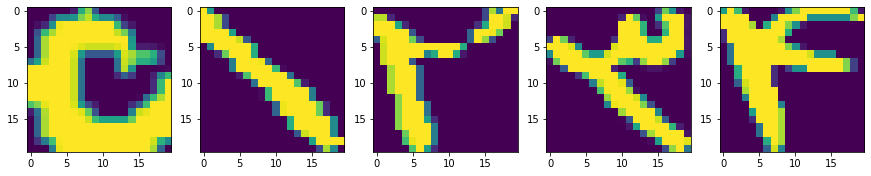

In [70]:
fig, ax = plt.subplots(1, 5, figsize=(15, 15))

predicts = []

index = 0
while True:
    if gaussian_without_smoothing[0][index] != 0:
        break
    index += 1
ax[0].imshow(test_data[0][index])
predicts.append(gaussian_without_smoothing[0][index])

index = 0
while True:
    if gaussian_without_smoothing[1][index] != 1:
        break
    index += 1
ax[1].imshow(test_data[1][index])
predicts.append(gaussian_without_smoothing[1][index])

index = 0
while True:
    if gaussian_without_smoothing[2][index] != 2:
        break
    index += 1
ax[2].imshow(test_data[2][index])
predicts.append(gaussian_without_smoothing[2][index])

index = 0
while True:
    if gaussian_without_smoothing[3][index] != 3:
        break
    index += 1
ax[3].imshow(test_data[3][index])
predicts.append(gaussian_without_smoothing[3][index])

index = 0
while True:
    if gaussian_without_smoothing[4][index] != 4:
        break
    index += 1
ax[4].imshow(test_data[4][index])
predicts.append(gaussian_without_smoothing[4][index])

print(predicts)